## Pi approx

In [1]:
import numpy as np
# np.random.seed(2)

pi_approx = []

for N in 10**np.arange(1,7):
    
    samples = np.random.rand(N, 2)

    N_in = np.sum(samples[:,0]**2 + samples[:,1]**2 <= 1)

    pi_approx.append(N_in/N*4)
    
  
print(pi_approx)

print(np.pi)

print(np.abs(np.array(pi_approx) - np.pi))



[2.8, 3.0, 3.1, 3.1476, 3.1404, 3.142884]
3.141592653589793
[0.34159265 0.14159265 0.04159265 0.00600735 0.00119265 0.00129135]


## Change of variable

In [2]:
mu = 1
sigma = 0.1

x = np.random.randn() # ~N(0,1)
y = mu + sigma*x # ~N(mu, sigma^2)

## Rejection sampling

In [3]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

x = np.arange(-50, 151)
M = max(p(x) / q(x))

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, M*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

3.9146256816520806


(-50.0, 150.0)

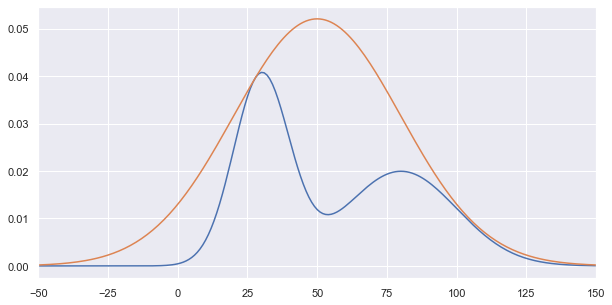

In [4]:
print(M)
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
ax.plot(x, p(x))
ax.plot(x, M*q(x))
plt.xlim([-50, 150])
# fig.savefig('RS_target_proposal.svg')
# fig.savefig('RS_target_proposal.png')


In [5]:
s = rejection_sampling(iter=100000)

(-50.0, 150.0)

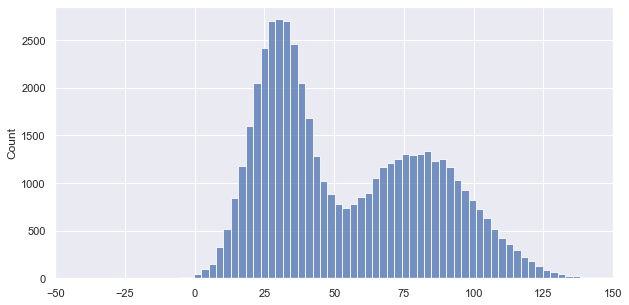

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
sns.histplot(s, ax=ax)
plt.xlim([-50, 150])
# fig.savefig('RS_hist.svg')
# fig.savefig('RS_hist.png')